In [1]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import statistics

## Sentiment Analysis
5/11/2022
Running down several blog articles in order to judge their sentiment

Schema for test is: title, content, polarity, subjectivity

In [2]:
# SpacyTextBlob objects

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# VADER objects

vader_analyzer = SentimentIntensityAnalyzer()

In [28]:
data_frame = pd.read_csv('./data/neg_data.csv')

In [29]:
data_frame.describe()

,word_count
count,13.000000
mean,1002.692308
std,979.181153
min,70.000000
25%,393.000000
50%,836.000000
75%,998.000000
max,3132.000000


In [30]:
def sentiment_analysis(value):
    """Runs the NLP model over each row's content field to interpet the article sentiment.

    Input - pd.DataFrame.row

    Output
          - article polarity: Float
          - article subjectivity: Float  
    """
    if value['content']:
        # spacyTextBlob operation
        text_data = value['content']
        doc = nlp(text_data)

        # VADER content operation is vader_analyzer object
        vader_polarity = vader_analyzer.polarity_scores(text_data)
        vader_polarity_compound = vader_polarity['compound']
        vader_polarity_pos = vader_polarity['pos']
        vader_polarity_neg = vader_polarity['neg']
        vader_polarity_neu = vader_polarity['neu']

        # aggregate the two libraries together
        aggregation = [doc._.blob.polarity,vader_polarity_compound]
        ensemble_sentiment_score = statistics.mean(aggregation)
        sentiment = ""

        if ensemble_sentiment_score >= 0.0:
            sentiment = "POSITIVE"
        else:
            sentiment = "NEGATIVE" 

        return pd.Series(
            [
                doc._.blob.polarity,
                doc._.blob.subjectivity,
                doc._.blob.sentiment_assessments.assessments,
                vader_polarity_compound,
                vader_polarity_pos,
                vader_polarity_neu,
                vader_polarity_neg,
                ensemble_sentiment_score,
                sentiment,
            ])
    
    else:
        return "N/A", "N/A"

In [31]:
data_frame[[
    'TB_polarity',
    'TB_subjectivity',
    'TB_assessments',
    'Vader_polarity',
    'Vader_positive',
    'Vader_neutral',
    'Vader_negative',
    'ensemble_sentiment_score',
    'sentiment'
    ]] = data_frame.apply(lambda row,: sentiment_analysis(row), axis=1)

In [48]:
data_frame.loc[data_frame['Vader_polarity'] <= 0.0].head(20)

,title,content,word_count,TB_polarity,TB_subjectivity,TB_assessments,Vader_polarity,Vader_positive,Vader_neutral,Vader_negative,ensemble_sentiment_score,sentiment
1,Python Is Not A Great Programming Language,"Instantly share code, notes, and snippet...",91,-0.100000,0.505556,"[([instantly], 0.0, 0.6666666666666666, None),...",-0.2718,0.044,0.891,0.065,-0.185900,NEGATIVE
3,Ian Mallett - Tutorials: Java is Bad for You Page,Java is Bad for You by Ian Mallett ====INTROD...,3132,0.076773,0.490374,"[([bad], -0.6999999999999998, 0.66666666666666...",-0.9914,0.094,0.801,0.105,-0.457313,NEGATIVE
4,"Experienced Developers, Use These Telltale Sig...",Photo by Tima Miroshnichenko from PexelsYou’ve...,836,-0.034986,0.473423,"[([bad], -0.6999999999999998, 0.66666666666666...",-0.7354,0.102,0.792,0.106,-0.385193,NEGATIVE
5,Java Makes Programmers Want To Do Absolutely A...,This question originally appeared on Quora: Wh...,1819,0.033512,0.496629,"[([originally], 0.375, 0.75, None), ([many], 0...",-0.9746,0.102,0.788,0.110,-0.470544,NEGATIVE
9,Java is a Bad Language,"By Tristan Olynick, Staff WriterAs someone w...",393,-0.032180,0.521271,"[([extensive], 0.0, 0.3333333333333333, None),...",-0.9103,0.058,0.856,0.085,-0.471240,NEGATIVE


### FineGrain look at the content

In [46]:
data_frame.iloc[11]

title                                               My negative views on Rust
content                      This is a little summary of my current though...
word_count                                                                982
TB_polarity                                                          0.170886
TB_subjectivity                                                      0.483501
TB_assessments              [([little], -0.1875, 0.5, None), ([current], 0...
Vader_polarity                                                          0.997
Vader_positive                                                          0.124
Vader_neutral                                                            0.82
Vader_negative                                                          0.056
ensemble_sentiment_score                                             0.583943
sentiment                                                            POSITIVE
Name: 11, dtype: object

In [ ]:
data_frame['content'].iloc[11]

## SpacyTextBlob

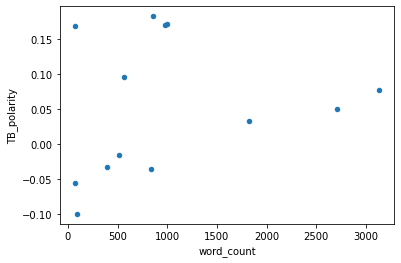

In [36]:
# examine the relationship between polarity and word_count, if any
chart = data_frame.plot(kind='scatter',x='word_count',y='TB_polarity')

In [37]:
# getting more information on the range found
maxdf = data_frame[data_frame['TB_polarity']==data_frame['TB_polarity'].max()]
mindf = data_frame[data_frame['TB_polarity']==data_frame['TB_polarity'].min()]
print("The range of polarity for the given articles is: " + str(maxdf.iloc[0]['TB_polarity']) + str(mindf.iloc[0]['TB_polarity']))

The range of polarity for the given articles is: 0.18266515781396733-0.10000000000000002


## VADER

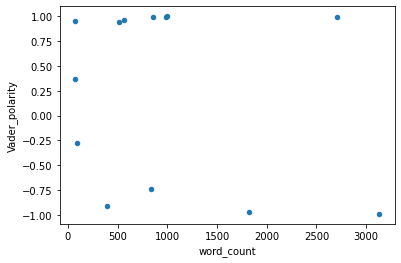

In [39]:
chart = data_frame.plot(kind='scatter',x='word_count',y='Vader_polarity')

In [84]:
# getting more information on the range found
maxdf = data_frame[data_frame['Vader_polarity']==data_frame['Vader_polarity'].max()]
mindf = data_frame[data_frame['Vader_polarity']==data_frame['Vader_polarity'].min()]
print("The range of polarity for the given articles is: " + str(maxdf.iloc[0]['Vader_polarity']) + str(mindf.iloc[0]['Vader_polarity']))

The range of polarity for the given articles is: 1.0-0.9939


<AxesSubplot:ylabel='Density'>

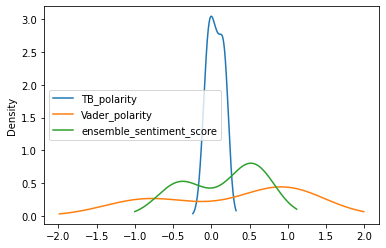

In [44]:
data_frame.plot(kind='kde',x='word_count',y=['TB_polarity','Vader_polarity','ensemble_sentiment_score'])

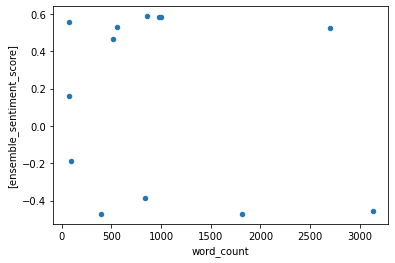

In [45]:
chart = data_frame.plot(kind='scatter',x='word_count',y=['ensemble_sentiment_score'])